In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import keras
keras.__version__

from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers
from keras.models import load_model
import h5py


from keras.utils import to_categorical

In [3]:
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
from google.colab import files

plt.rcParams['mathtext.fontset'] = 'stix' 
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

Tc=1.2 #AF, TRIANGULAR LATTICE

#ConvNet with a window of width a=0.2

In [ ]:
dict_convgraphs_a02={}
markers_conv=['s','^']
colors_conv=['darkred','darkblue']

##30x30 lattice

In [ ]:
a=0.2
L=30

data_path='drive/My Drive/Tesina und Paper/Data/Triang/L'+str(int(L))+'.txt'
data30=[]
with open(data_path, newline='\n') as csvfile:
  csv_reader = csv.reader(csvfile, delimiter=' ')
  for line in csv_reader:
    data30.append(line)

for x in data30:
  x.remove('')

random.shuffle(data30) # shuffle all data

test_labels_30a=[]
test_temperatures_30a=[]
train_labels_30a=[]
train_temperatures_30a=[]
train_data_30a=[]
test_data_30a=[]
print("removed from ", Tc-a," to ",Tc+a)
for element in data30:
  proba=random.random()
  if ((float(element[1])>=(Tc-a) and float(element[1])<=(Tc+a)) or (proba<0.15)):
    label=element.pop(0) # remove the first element, the label
    test_labels_30a.append(label) # add to label list
    TT=element.pop(0)  # remove the second element, the temperature
    test_temperatures_30a.append(TT) # add to temperature list
    test_data_30a.append(element)
  else:
    label=element.pop(0) # remove the first element, the label
    train_labels_30a.append(label) # add to label list
    TT=element.pop(0)  # remove the second element, the temperature
    train_temperatures_30a.append(TT) # add to temperature list
    train_data_30a.append(element)
    

#numpy arrays of strings, and string to integers
train_data_30a=np.array(train_data_30a)
rescaled_tr=len(train_data_30a)
train_data_30a=train_data_30a.reshape(rescaled_tr,L,L,1)
train_data_30a = train_data_30a.astype(np.float)
train_data_30a=(train_data_30a+1.)/2 # normalizacion 

test_data_30a=np.array(test_data_30a)
rescaled_te=len(test_data_30a)
test_data_30a=test_data_30a.reshape(rescaled_te,L,L,1)
test_data_30a = test_data_30a.astype(np.float)
test_data_30a=(test_data_30a+1.)/2 # normalizacion

train_labels_30a=np.array(train_labels_30a)
train_labels_30a = train_labels_30a.astype(np.int)

test_labels_30a=np.array(test_labels_30a)
test_labels_30a = test_labels_30a.astype(np.int)

train_temperatures_30a=np.array(train_temperatures_30a)
train_temperatures_30a=train_temperatures_30a.astype(np.float)

test_temperatures_30a=np.array(test_temperatures_30a)
test_temperatures_30a=test_temperatures_30a.astype(np.float)


#just to check
print('length of train data: ', len(train_data_30a))

print('length of test data: ', len(test_data_30a))

train_labels_30a = to_categorical(train_labels_30a)
test_labels_30a = to_categorical(test_labels_30a)

adann=optimizers.Adam(lr=0.001,beta_1=0.9, beta_2=0.999, amsgrad=False)

model30 = models.Sequential()
model30.add(layers.Conv2D(10, (3, 3), activation='relu', input_shape=(L, L, 1)))
model30.add(layers.MaxPooling2D((2, 2)))
model30.add(layers.Flatten())
model30.add(layers.Dense(10, activation='relu'))
model30.add(layers.Dense(2, activation='softmax'))


epochs_vall=8
Bsizee=100


model30.compile(optimizer=adann,
loss='categorical_crossentropy',
metrics=['accuracy'])
history=model30.fit(train_data_30a, train_labels_30a, validation_split=0.1,
          shuffle=True, epochs=epochs_vall, batch_size=Bsizee)

history_dict = history.history
print('history_dictionary: ', history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, epochs_vall + 1)
#“bo” is for“blue dot.”
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
#“b” is for “solid blue line.”
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

#plotting accuracies
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

number of temperatures:  200


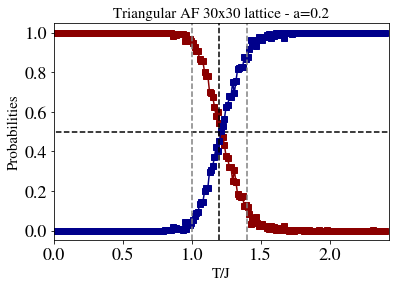

In [ ]:
test_predictions=model30.predict(test_data_30a)

prob_T=[]

for j in range(len(test_temperatures_30a)):
  prob_T.append([test_temperatures_30a[j],test_predictions[j]])

prob_T=sorted(prob_T,key=lambda x: x[0])
len(prob_T)


j=0
epsilon=0.001
j_max=len(prob_T)

while(j+1 < j_max-1):
  count=1
  while(j+1 < j_max and abs(prob_T[j][0]-prob_T[j+1][0]  )<epsilon):
    count=count+1
    x=prob_T.pop(j+1)
    prob_T[j][1]=prob_T[j][1]+x[1]
    j_max=len(prob_T)
  prob_T[j][1]=prob_T[j][1]/float(count)
  j=j+1
  j_max=len(prob_T)

print('number of temperatures: ',len(prob_T))

### plotting

T_lista=[]
p1_lista=[];p2_lista=[];check_list=[]

for j in range(len(prob_T)):
  T_lista.append(prob_T[j][0])
  p1_lista.append(prob_T[j][1][0])
  p2_lista.append(prob_T[j][1][1])


plt.plot(T_lista, p1_lista, color='darkred',marker='s')
plt.plot(T_lista, p2_lista, color='darkblue',marker='s')

plt.title('Triangular AF 30x30 lattice - a='+str(float(a)),size = 15)
plt.xlabel('T/J',size = 15)
plt.ylabel('Probabilities',size = 15)

plt.axvline(x=1.2,color='black',linestyle='--')
plt.axvline(x=Tc-a,color='gray',linestyle='--')
plt.axvline(x=Tc+a,color='gray',linestyle='--')
plt.hlines(y=0.5,xmin=-0.1,xmax=2.43,color='black',linestyle='--')

plt.xlim(0,2.43)
plt.show()

In [ ]:
#if we like the results, we use this cell to save them for the final graph
dict_convgraphs_a02['p1'+str(L)]=p1_lista
dict_convgraphs_a02['p2'+str(L)]=p2_lista

In [ ]:
modelpath='drive/My Drive/Tesina und Paper'
modelname_30_a02=modelpath+'/model_tr_30_a0.2.h5'

model30.save(modelname_30_a02)  # creates a HDF5 file 'my_model.h5'

##20x20 lattice

In [4]:
a=0.2
L=20

data_path='drive/My Drive/Tesina und Paper/Data/Triang/L'+str(int(L))+'.txt'
data=[]
with open(data_path, newline='\n') as csvfile:
  csv_reader = csv.reader(csvfile, delimiter=' ')
  for line in csv_reader:
    data.append(line)

for x in data:
  x.remove('')

random.shuffle(data) # shuffle all data

test_labels_a=[]
test_temperatures_a=[]
train_labels_a=[]
train_temperatures_a=[]
train_data_a=[]
test_data_a=[]
print("removed from ", Tc-a," to ",Tc+a)
for element in data:
  proba=random.random()
  if ((float(element[1])>=(Tc-a) and float(element[1])<=(Tc+a)) or (proba<0.15)):
    label=element.pop(0) # remove the first element, the label
    test_labels_a.append(label) # add to label list
    TT=element.pop(0)  # remove the second element, the temperature
    test_temperatures_a.append(TT) # add to temperature list
    test_data_a.append(element)
  else:
    label=element.pop(0) # remove the first element, the label
    train_labels_a.append(label) # add to label list
    TT=element.pop(0)  # remove the second element, the temperature
    train_temperatures_a.append(TT) # add to temperature list
    train_data_a.append(element)
    

#numpy arrays of strings, and string to integers
train_data_a=np.array(train_data_a)
rescaled_tr=len(train_data_a)
train_data_a=train_data_a.reshape(rescaled_tr,L,L,1)
train_data_a = train_data_a.astype(np.float)
train_data_a=(train_data_a+1.)/2 # normalizacion 

test_data_a=np.array(test_data_a)
rescaled_te=len(test_data_a)
test_data_a=test_data_a.reshape(rescaled_te,L,L,1)
test_data_a = test_data_a.astype(np.float)
test_data_a=(test_data_a+1.)/2 # normalizacion

train_labels_a=np.array(train_labels_a)
train_labels_a = train_labels_a.astype(np.int)

test_labels_a=np.array(test_labels_a)
test_labels_a = test_labels_a.astype(np.int)

train_temperatures_a=np.array(train_temperatures_a)
train_temperatures_a=train_temperatures_a.astype(np.float)

test_temperatures_a=np.array(test_temperatures_a)
test_temperatures_a=test_temperatures_a.astype(np.float)


#to check
print('length of train data: ', len(train_data_a))

print('length of test data: ', len(test_data_a))

train_labels_a = to_categorical(train_labels_a)
test_labels_a = to_categorical(test_labels_a)

removed from  1.0  to  1.4
length of train data:  56665
length of test data:  23335


In [ ]:
adan=optimizers.Adam(lr=0.001,beta_1=0.9, beta_2=0.999, amsgrad=False)

model20 = models.Sequential()
model20.add(layers.Conv2D(10, (3, 3), activation='relu', input_shape=(L, L, 1)))
model20.add(layers.MaxPooling2D((2, 2)))
model20.add(layers.Flatten())
model20.add(layers.Dense(10, activation='relu'))
model20.add(layers.Dense(2, activation='softmax'))


epochs_val=8
Bsize=100

model20.compile(optimizer=adan,
loss='categorical_crossentropy',
metrics=['accuracy'])
history=model20.fit(train_data_a, train_labels_a, validation_split=0.1,
          shuffle=True, epochs=epochs_val, batch_size=Bsize)

history_dict = history.history
print('history_dictionary: ', history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, epochs_val + 1)
#“bo” is for“blue dot.”
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
#“b” is for “solid blue line.”
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

#plotting accuracies
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

number of temperatures:  200


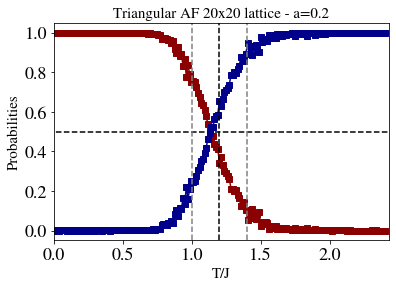

In [ ]:
test_predictions=model20.predict(test_data_a)

prob_T=[]

for j in range(len(test_temperatures_a)):
  prob_T.append([test_temperatures_a[j],test_predictions[j]])

prob_T=sorted(prob_T,key=lambda x: x[0])
len(prob_T)


j=0
epsilon=0.001
j_max=len(prob_T)

while(j+1 < j_max-1):
  count=1
  while(j+1 < j_max and abs(prob_T[j][0]-prob_T[j+1][0]  )<epsilon):
    count=count+1
    x=prob_T.pop(j+1)
    prob_T[j][1]=prob_T[j][1]+x[1]
    j_max=len(prob_T)
  prob_T[j][1]=prob_T[j][1]/float(count)
  j=j+1
  j_max=len(prob_T)

print('number of temperatures: ',len(prob_T))

### plotting

#T_lista=[]
p1_lista=[];p2_lista=[];check_list=[]

for j in range(len(prob_T)):
  #T_lista.append(prob_T[j][0])
  p1_lista.append(prob_T[j][1][0])
  p2_lista.append(prob_T[j][1][1])


plt.plot(T_lista, p1_lista, color='darkred',marker='s')
plt.plot(T_lista, p2_lista, color='darkblue',marker='s')

plt.title('Triangular AF '+str(int(L))+'x'+str(int(L))+' lattice - a='+str(float(a)),size = 15)
plt.xlabel('T/J',size = 15)
plt.ylabel('Probabilities',size = 15)

plt.axvline(x=1.2,color='black',linestyle='--')
plt.axvline(x=Tc-a,color='gray',linestyle='--')
plt.axvline(x=Tc+a,color='gray',linestyle='--')
plt.hlines(y=0.5,xmin=-0.1,xmax=2.43,color='black',linestyle='--')

plt.xlim(0,2.43)
plt.show()

In [ ]:
#if we like the results, we use this cell to save them for the final graph
dict_convgraphs_a02['p120']=p1_lista
dict_convgraphs_a02['p220']=p2_lista
modelpath='drive/My Drive/Tesina und Paper'
modelname_20_a02=modelpath+'/model_tr_20_a0.2.h5'

model20.save(modelname_20_a02)  # creates a HDF5 file 'my_model.h5'

##Both together in the same graph

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

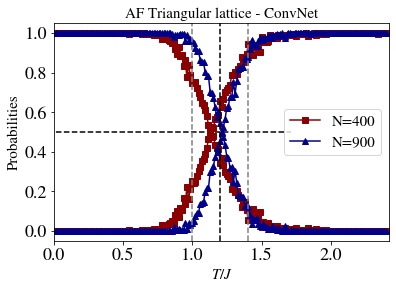

In [ ]:
for i in range(20,31,10):
  plt.plot(T_lista, dict_convgraphs_a02['p1'+str(i)], color=colors_conv[int(i/10 - 2)], label='N='+str(i*i),marker=markers_conv[int(i/10 - 2)])
  plt.plot(T_lista, dict_convgraphs_a02['p2'+str(i)], color=colors_conv[int(i/10 - 2)],marker=markers_conv[int(i/10 - 2)])

plt.title('Triangular lattice (CNN)',size = 15)
plt.xlabel(r'$T/J$',size = 15)
plt.ylabel('Probabilities',size = 15)

plt.legend(prop={'size': 15})
plt.axvline(x=Tc,color='black',linestyle='--')
plt.axvline(x=Tc-a,color='gray',linestyle='--') #we replaced this lines with the gray area
plt.axvline(x=Tc+a,color='gray',linestyle='--') #we replaced this lines with the gray area
#v1=Tc-a ; v2=Tc+a
#plt.axvspan(v1, v2, color='gray', alpha=0.3, lw=0) # shaded gray

xmaxx=2.45
plt.hlines(y=0.5,xmin=-0.1,xmax=0.7*xmaxx,color='black',linestyle='--')
plt.xlim(0,2.42)

plt.savefig('tr_convnet_a0.2.pdf',bbox_inches='tight')
files.download('tr_convnet_a0.2.pdf')

plt.show()